<a href="https://colab.research.google.com/github/vivirocha/Bootcamp_MachineLearning/blob/main/Trabalho1_M%C3%B3dulo_2_Modelos_Preditivos_e_S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bootcamp IGTI - Eng. Machine Learning
Trabalho Prático 1 - Módulo 2

Tema: Modelos Preditivos e Séries Temporais

In [454]:
#Importando bibliotecas
import numpy as np
import pandas as pd

In [455]:
bike = pd.read_csv("bike-sharing.csv")

A seguir, um descritivo dos dados coletados: <br> 
<br>
**rec_id**: índice do registro de locação. <br>
**datetime**: data.<br>
**season**: estação do ano (1: inverno, 2: primavera, 3: verão, 4: outono). Relativo ao hemisfério norte. <br>
**year**: ano (0: 2011, 1:2012). <br>
**month**: mês (1 a 12). <br>
**hour**: hora do dia (0 a 23). <br>
**is_holiday**: booleano indicando feriado. <br>
**weekday**: dia da semana (0: domingo, 1: segunda-feira, …, 6: sábado). <br>
**is_workingday**: booleano indicando dia útil. <br>
**weather_condition**: (1: limpo, 2: nublado, 3: chuva leve, 4: chuva forte). <br>
**temp**: temperatura escalada entre 0 e 1. Valor original em graus Celsius: -8 a 39. <br>
**atemp**: sensação térmica escalada entre 0 e 1. Valor original em graus Celsius: -16 a 50. <br>
**humidity**: umidade relativa (0 a 1). <br>
**windspeed**: velocidade do vento escalada entre 0 e 1 (máximo original: 67). <br>
**casual**: número de locações para usuários casuais. <br>
**registered**: número de locações para usuários registrados. <br>
**total_count**: contador total de aluguéis (casual+registered).<br>

Qual é o tamanho do dataset?

In [456]:
bike.shape

(17379, 17)

Nosso dataset tem 17.379 observações e 17 variáveis.

Vamos utilizar o comando head para vermos os primeiros dados do nosso dataset.

In [457]:
bike.head()

,datetime,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Qual a média da coluna windspeed?

In [458]:
np.mean(bike['windspeed'])

0.1900976063064631

A média da coluna Windspeed é 0.19

Qual a média da coluna temp?

In [459]:
np.mean(bike['temp'])

0.4969871684216586

A média da coluna Temp é 0.47

Quantos registros existem para o ano de 2011 para o ano de 2012?

In [460]:
bike.groupby('year').count()

,datetime,rec_id,season,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
year,,,,,,,,,,,,,,,,
0,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645,8645
1,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734,8734


Existem 8.645 registros para o ano de 2011 e 8.734 registros para o ano de 2012.

 Quantas locações de bicicletas foram efetuadas em 2011 e quantas foram efetuadas em 2012?


In [461]:
#Vamos selecionar apenas os dados do ano 0 (2011) em um
a2011=bike['year']==0


In [462]:
#Criando um filtro para os dados do anos 2011
filtro1 = bike[a2011]
filtro1.total_count.sum()


1243103

Em 2011 houveram 1.243.103 locações de bicicletas e em 2012 houveram 2.049.576

In [463]:
a2012=bike['year']==1
filtro2 = bike[a2012]
filtro2.total_count.sum()

2049576

Qual estação do ano contém a **maior** média de locações de bicicletas? 
Qual estação do ano contém a **menor** média de locações de bicicletas? 

In [464]:
np.unique(bike['season'])

array([1, 2, 3, 4])

In [465]:
s1=bike['season']==1
f1 = bike[s1]
f1.total_count.mean()

111.11456859971712

In [466]:
s2=bike['season']==2
f2 = bike[s2]
f2.total_count.mean()

208.34406894987526

In [467]:
s3=bike['season']==3
f3 = bike[s3]
f3.total_count.mean()


236.01623665480426

In [468]:
s4=bike['season']==4
f4 = bike[s4]
f4.total_count.mean()


198.86885633270322

Qual horário do dia contém a **maior** média de locações de bicicletas?  <br>
Qual horário do dia contém a **menor** média de locações de bicicletas? 



In [469]:
import seaborn as sns
import matplotlib.pyplot as plt

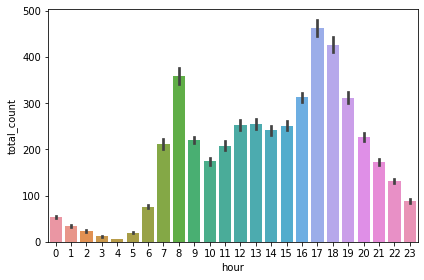

In [470]:
fig, ax = plt.subplots()
sns.barplot(x=bike['hour'], y=bike['total_count'], ax=ax, data=bike)
#otimizar espaço da figure
fig.tight_layout();

Que dia da semana contém a **maior** média de locações de bicicletas? <br>
Que dia da semana contém a **menor** média de locações de bicicletas? 



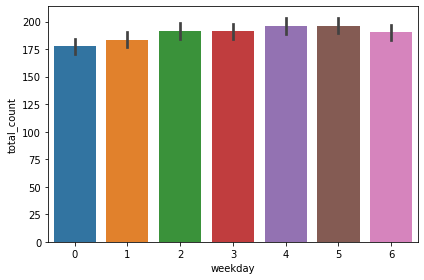

In [471]:
fig, ax = plt.subplots()
sns.barplot(x=bike['weekday'], y=bike['total_count'], ax=ax, data=bike)
#otimizar espaço da figure
fig.tight_layout();

Às quartas-feiras (weekday = 3), qual horário do dia contém a **maior** média de locações de bicicletas? 

In [479]:
quarta = bike[bike['weekday']==3].groupby('hour')['total_count'].mean()
quarta

hour
0      34.557692
1      15.336538
2       7.813725
3       4.888889
4       4.968750
5      25.750000
6     107.807692
7     303.980769
8     488.326923
9     238.528846
10    131.894231
11    152.201923
12    193.903846
13    185.826923
14    170.548077
15    181.288462
16    272.961538
17    513.144231
18    494.029126
19    357.504854
20    256.660194
21    194.669903
22    143.689320
23     83.737864
Name: total_count, dtype: float64

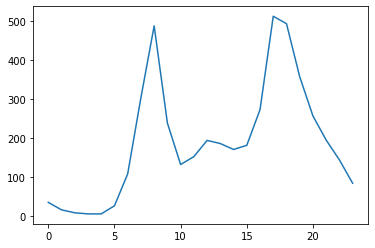

In [473]:
plt.plot(quarta)

In [474]:
sabado = bike[bike['weekday']==6].groupby('hour')['total_count'].mean()
sabado

hour
0      94.304762
1      67.780952
2      50.495238
3      22.885714
4       7.657143
5       8.291262
6      21.000000
7      45.961905
8     114.476190
9     186.790476
10    263.723810
11    328.609524
12    375.380952
13    385.371429
14    381.333333
15    382.428571
16    366.142857
17    334.409524
18    292.048077
19    239.932692
20    180.865385
21    156.000000
22    139.663462
23    115.855769
Name: total_count, dtype: float64

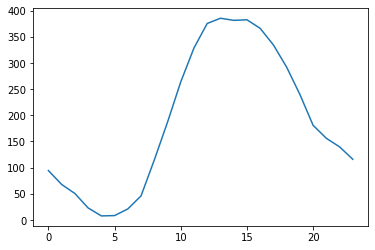

In [475]:
plt.plot(sabado)